# Forking Paths

To provide some intuition about Bayesian estimates and updating, this notebook draws heavily on McElreath's treatment in Statistical Rethinking (Chapter 2).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pymc as pm
from typing import Set, List, Dict, Callable
import graphviz as gz
from statsconcepts.forking import *

%load_ext autoreload
%aimport statsconcepts.forking
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


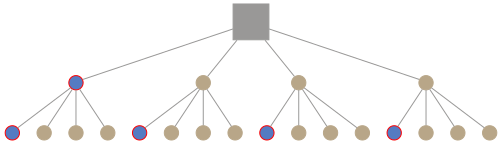

In [73]:
ft: ForkingTree = ForkingTree(n_w=1, n_l=3, n_draws=2)
ft.g

In [37]:
ft.g??

Type:        Graph
String form:
graph ForkingTree {
	0 [label="" color="#999897" shape=square style=filled]
	0 -- 00 [color="#999897"]
	00 [label="" color="#557bc2" edge_color=black shape=circle style=filled]
	00 -- 000 [color="#999897"]
	000 [label="" color="#557bc2" edge_color=black shape=circle style=filled]
	00 -- 001 [color="#999897"]
	001 [label="" color="#b8a688" shape=circle style=filled]
	00 -- 002 [color="#999897"]
	002 [label="" color="#b8a688" shape=circle style=filled]
	00 -- 003 [color="#999897"]
	003 [label="" color="#b8a688" shape=circle style=filled]
	0 -- 01 [color="#999897"]
	01 [label="" color="#b8a688" shape=circle style=filled]
	01 -- 010 [color="#999897"]
	010 [label="" color="#557bc2" edge_color=black shape=circle style=filled]
	01 -- 011 [color="#999897"]
	011 [label="" color="#b8a688" shape=circle style=filled]
	01 -- 012 [color="#999897"]
	012 [label="" color="#b8a688" shape=circle style=filled]
	01 -- 013 [color="#999897"]
	013 [label="" color="#b8a688" shap

In [81]:
print(ft.g.source)

graph ForkingTree {
	0 [label="" color="#999897" shape=square style=filled]
	0 -- 00 [color="#999897"]
	00 [label="" color=red fillcolor="#557bc2" shape=circle style=filled width=0.2]
	00 -- 000 [color="#999897"]
	000 [label="" color=red fillcolor="#557bc2" shape=circle style=filled width=0.2]
	00 -- 001 [color="#999897"]
	001 [label="" color="#b8a688" shape=circle style=filled width=0.2]
	00 -- 002 [color="#999897"]
	002 [label="" color="#b8a688" shape=circle style=filled width=0.2]
	00 -- 003 [color="#999897"]
	003 [label="" color="#b8a688" shape=circle style=filled width=0.2]
	0 -- 01 [color="#999897"]
	01 [label="" color="#b8a688" shape=circle style=filled width=0.2]
	01 -- 010 [color="#999897"]
	010 [label="" color=red fillcolor="#557bc2" shape=circle style=filled width=0.2]
	01 -- 011 [color="#999897"]
	011 [label="" color="#b8a688" shape=circle style=filled width=0.2]
	01 -- 012 [color="#999897"]
	012 [label="" color="#b8a688" shape=circle style=filled width=0.2]
	01 -- 013 [col